In [1]:
import pandas as pd
from sklearn.utils import resample

# Đọc dữ liệu gốc
df = pd.read_csv("momo_reviews_labeled.csv")  

# Phân tách các lớp nhãn
df_positive = df[df["label"] == "Tích cực"]
df_negative = df[df["label"] == "Tiêu cực"]
df_neutral  = df[df["label"] == "Trung lập"]

# Lấy số lượng lớn nhất trong các nhãn
max_count = max(len(df_positive), len(df_negative), len(df_neutral))

# Oversampling các lớp nhỏ hơn
df_positive_upsampled = resample(df_positive, replace=True, n_samples=max_count, random_state=42)
df_negative_upsampled = resample(df_negative, replace=True, n_samples=max_count, random_state=42)
df_neutral_upsampled  = resample(df_neutral,  replace=True, n_samples=max_count, random_state=42)

# Gộp lại và shuffle
df_balanced = pd.concat([df_positive_upsampled, df_negative_upsampled, df_neutral_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# In ra kiểm tra
print(df_balanced["label"].value_counts())

# Lưu lại file nếu cần
df_balanced.to_csv("momo_reviews_balanced.csv", index=False)


label
Trung lập    4801
Tiêu cực     4801
Tích cực     4801
Name: count, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Đọc dữ liệu gốc
df = pd.read_csv("momo_reviews_balanced.csv") 

In [6]:
# Số lượng từng loại sentiment
df['label'].value_counts()

# Tỉ lệ phần trăm
df['label'].value_counts(normalize=True) * 100

label
Trung lập    33.333333
Tiêu cực     33.333333
Tích cực     33.333333
Name: proportion, dtype: float64

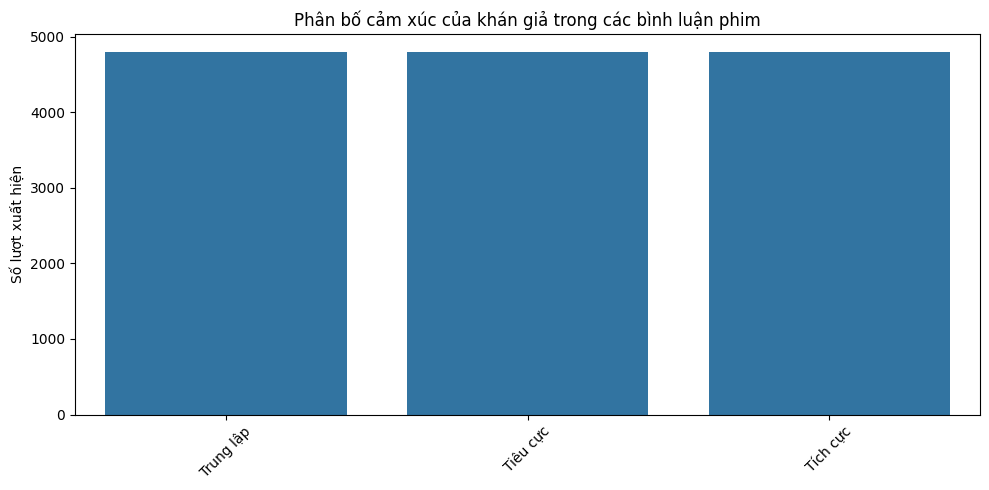

In [ ]:

# --- BIỂU ĐỒ TAG CẢM XÚC PHỔ BIẾN ---

all_Sentiment =df['label'].dropna().str.split(', ')
flat_Sentiment = [tag for sublist in all_Sentiment for tag in sublist if tag]

# Đếm tần suất các tag
tag_counts = Counter(flat_Sentiment)

# Lấy top 10 tag cảm xúc phổ biến
top_Sentiment = dict(sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_Sentiment.keys()), y=list(top_Sentiment.values()))
plt.title("Phân bố cảm xúc của khán giả trong các bình luận phim sau khi cân bằng")
plt.xticks(rotation=45)
plt.ylabel("Số lượt xuất hiện")
plt.tight_layout()
plt.show()
